In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Load the dataset
data = pd.read_csv("/Users/apple/Desktop/CodSoft Intership Projects / Customer Churn Prediction /Churn_Modelling.csv")

In [3]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [4]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Missing Values in Each Column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
# Drop unnecessary columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [6]:
data = pd.get_dummies(data, drop_first=True)

In [7]:
# Convert to integer type
data = data.astype(int)

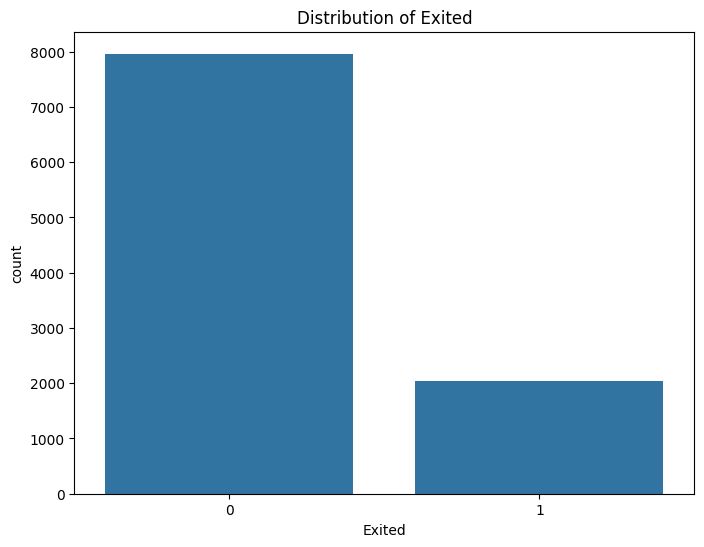

In [8]:
# Visualize the target variable distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited')
plt.show()

In [9]:
# Splitting the data into features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape:', X_train.shape)
print('Testing Shape:', X_test.shape)

Training Shape: (9000, 11)
Testing Shape: (1000, 11)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    return accuracy

In [16]:
# Initialize and evaluate selected models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

performance_summary_list = []

for model_name, model in models.items():
    print(f'Evaluating {model_name}...')
    accuracy = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    performance_summary_list.append({'Model': model_name, 'Accuracy': accuracy})
    print('-'*30)

Evaluating Logistic Regression...
Accuracy: 0.81
Precision: 0.50
Recall: 0.19
F1 Score: 0.28
------------------------------
Evaluating Random Forest...
Accuracy: 0.87
Precision: 0.72
Recall: 0.49
F1 Score: 0.58
------------------------------
Evaluating Gradient Boosting...
Accuracy: 0.87
Precision: 0.74
Recall: 0.47
F1 Score: 0.57
------------------------------


In [18]:
# Convert list to DataFrame
performance_summary = pd.DataFrame(performance_summary_list)
print("\nPerformance Summary:")
print(performance_summary)


Performance Summary:
                 Model  Accuracy
0  Logistic Regression     0.809
1        Random Forest     0.866
2    Gradient Boosting     0.867


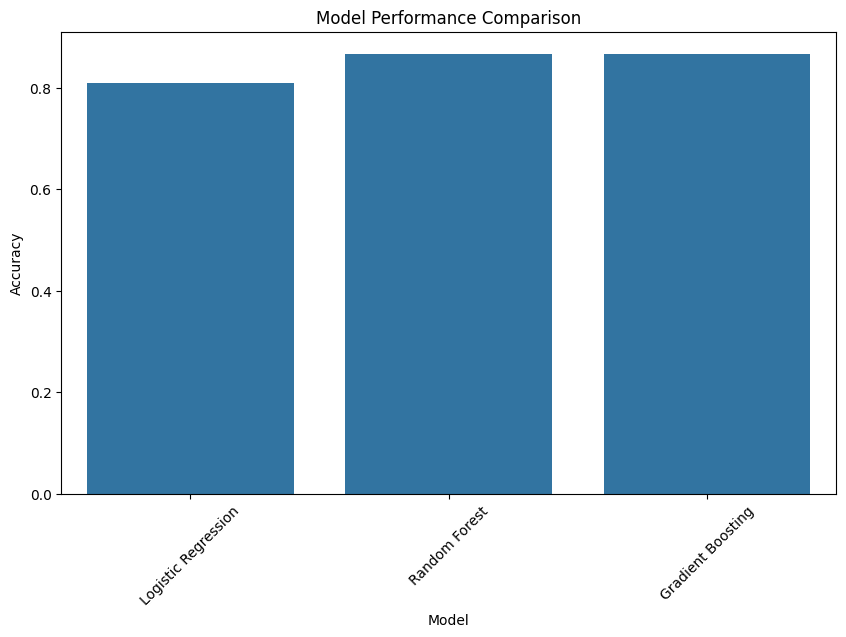

In [19]:
# Visualizing the model performance
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=performance_summary)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()